In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset



In [113]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

## 1
How many samples are there in the dataset?


In [25]:
X.shape[0]

50

## 2

How many features are there in the dataset?


In [26]:
X.shape[1]

2

## 3
In the target vector $y$, replace all occurrences of 0 with -1. 



In [114]:
y [y==0] = -1

## 4

How many unique classes are there in the target vector?


In [47]:
np.unique(y)

array([-1,  1])

## 5
Plot the data keeping first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

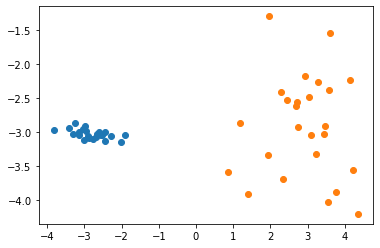

In [29]:
plt.scatter(X[:,0][y == -1],X[:,1][y == -1]);
plt.scatter(X[:,0][y == 1],X[:,1][y== 1]);

## 6
Initialize w to be a zero vector, with shape equal to the number of features in the data.



In [51]:
w = np.zeros(X.shape[1])
w

array([0., 0.])

## 7 
Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.



In [43]:
y_pred = np.array([])
for each in X:
  y_pred_some = 1 if(w.T@each >= 0) else -1
  # print(y_pred_some)
  y_pred = np.append(y_pred, [y_pred_some])
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 8

(In the same code,) If prediction does not match the actual class label for any data point, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.


In [59]:
w = np.zeros(X.shape[1])
total_mistakes = 0

for i in range(X.shape[0]):
  y_pred = 1 if w.T @ X[i] >= 0 else -1
  # print(y[i],y_pred)

  if(y[i] != y_pred):
    w = w - (y_pred*X[i])
    total_mistakes += 1

w

array([ 6.08372134, -0.97979197])

## 9
(In the same code,) keep track of the total number of mistakes made by the algorithm.

In [53]:
total_mistakes

2

## 10.
So far, we have run only one iteration over the entire data.

Run the same for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In [115]:
w = np.zeros(X.shape[1])
epochs = 10
total_mistakes = np.zeros(epochs).astype('int64')

for epoch in range(epochs):
  print('Epoch No.: ', epoch)

  for i in range(X.shape[0]):
    y_pred = 1 if w.T @ X[i] >= 0 else -1
    # print(y[i],y_pred)

    if(y[i] != y_pred):
      w = w - (y_pred*X[i])
      total_mistakes[epoch] += 1
  print('Mistakes: ',total_mistakes[epoch])
  if(epoch !=0 ):
    if(total_mistakes[epoch] == 0 or total_mistakes[epoch]==total_mistakes[epoch-1]):
      print('No Weight updated','Stopping Iteration',sep='\n')
      break
print('\nTotal Mistakes: ', np.sum(total_mistakes))

Epoch No.:  0
Mistakes:  2
Epoch No.:  1
Mistakes:  0
No Weight updated
Stopping Iteration

Total Mistakes:  2


## 11

Plot the vector w and the decision boundary thus obtained.


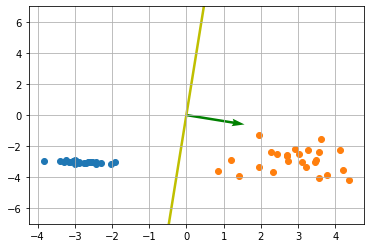

In [98]:
plt.scatter(X[:,0][y == -1],X[:,1][y == -1]);
plt.scatter(X[:,0][y == 1],X[:,1][y== 1]);

plt.quiver(0,0, w[0], w[1], scale = 35, color = 'g');
plt.quiver(0, 0, -w[1], w[0], scale=10, color = 'y', headaxislength=0,
           headlength=0)
plt.quiver(0, 0, w[1], -w[0], scale=10, color = 'y', headaxislength=0,
           headlength=0)
plt.ylim(-7,7)
plt.grid()

## 12
What is the value of loss using the weight vector obtained earlier?  


In [90]:
loss = 0

y_pred = np.array([])
for each in X:
  y_pred_some = 1 if(w.T@each >= 0) else -1
  # print(y_pred_some)
  y_pred = np.append(y_pred, [y_pred_some])

for i in range(len(y)):
  if(y[i] != y_pred[i]):
    loss+=1
loss

0

# Non-linearly separable case

## 13
Now use a data set that is not linearly separable. Replace occurrences of 0 with -1 and visualize.



In [118]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

In [119]:
y [y==0] = -1

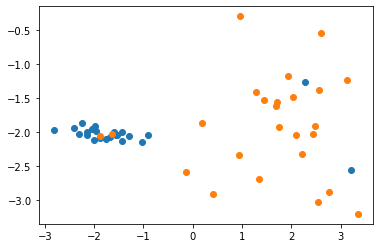

In [101]:
plt.scatter(X[:,0][y == -1],X[:,1][y == -1]);
plt.scatter(X[:,0][y == 1],X[:,1][y== 1]);

## 14

Apply the Perceptron code again. 

What is the number of weight updates performed in each epoch?


In [120]:
w = np.zeros(X.shape[1])
epochs = 10
total_mistakes = np.zeros(epochs).astype('int64')

for epoch in range(epochs):
  print('Epoch No.: ', epoch)

  for i in range(X.shape[0]):
    y_pred = 1 if w.T @ X[i] >= 0 else -1
    # print(y[i],y_pred)

    if(y[i] != y_pred):
      w = w - (y_pred*X[i])
      total_mistakes[epoch] += 1
  print('Mistakes: ',total_mistakes[epoch])
  if(epoch !=0 ):
    if(total_mistakes[epoch] == 0 or total_mistakes[epoch]==total_mistakes[epoch-1]):
      print('No Weight updated','Stopping Iteration',sep='\n')
      break
print('\nTotal Mistakes: ', np.sum(total_mistakes))

Epoch No.:  0
Mistakes:  13
Epoch No.:  1
Mistakes:  11
Epoch No.:  2
Mistakes:  12
Epoch No.:  3
Mistakes:  11
Epoch No.:  4
Mistakes:  11
No Weight updated
Stopping Iteration

Total Mistakes:  58


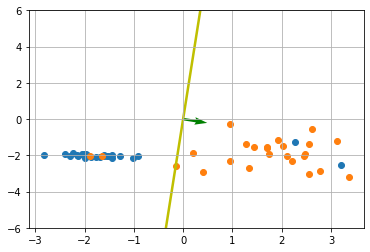

In [121]:
plt.scatter(X[:,0][y == -1],X[:,1][y == -1]);
plt.scatter(X[:,0][y == 1],X[:,1][y== 1]);

plt.quiver(0,0, w[0], w[1], scale = 35, color = 'g');
plt.quiver(0, 0, -w[1], w[0], scale=5, color = 'y', headaxislength=0,
           headlength=0)
plt.quiver(0, 0, w[1], -w[0], scale=5, color = 'y', headaxislength=0,
           headlength=0)
plt.ylim(-6,6)
plt.grid()

In [122]:
loss = 0

y_pred = np.array([])
for each in X:
  y_pred_some = 1 if(w.T@each >= 0) else -1
  # print(y_pred_some)
  y_pred = np.append(y_pred, [y_pred_some])

for i in range(len(y)):
  if(y[i] != y_pred[i]):
    loss+=1
loss

4